# Data Preprocessing


In [1]:
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

import pandas as pd
import numpy as np

In [ ]:
import io
features = pd.read_csv('features.csv')
# Dataset is now stored in a Pandas Dataframe

In [ ]:
features.set_index(features['Date'])
features.set_index(features['Store'])
features.head()
# print(features.shape)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
features.shape

(8190, 12)

In [ ]:
target = pd.read_csv('train.csv')
target.head()
# print(target.shape)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
target.shape

(421570, 5)

In [ ]:
store = pd.read_csv('stores.csv')
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
store.shape

(45, 3)

In [ ]:
# right join features and target data on Date
df = pd.merge(features, target, how = 'right', on=['Date', 'Store'])
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1,46039.49,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,1,41595.55,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,1,19403.54,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,1,21827.90,False


In [ ]:
df.shape

(421570, 15)

In [ ]:
# dropping noninformative variables
df = df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
df.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,1,24924.50,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,1,46039.49,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,1,41595.55,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,1,19403.54,False
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False,1,21827.90,False


In [ ]:
df.shape

(421570, 10)

In [ ]:
# left join df and store on Store
df = df.drop(['IsHoliday_y'], 1)
df = df.rename(columns={"IsHoliday_x": "IsHoliday"})
walmart = pd.merge(df, store, how = 'left', on=['Store'])
walmart.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,1,46039.49,A,151315
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,1,41595.55,A,151315
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,1,19403.54,A,151315
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False,1,21827.90,A,151315


In [ ]:
walmart.shape

(421570, 11)

In [ ]:
# check N/A values and remove N/A values
walmart.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Dept            0
Weekly_Sales    0
Type            0
Size            0
dtype: int64

In [ ]:
# checking if there is any negative values for weekly sales
walmart.loc[walmart['Weekly_Sales']<=0]

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
846,1,2012-08-10,85.05,3.494,221.958433,6.908,False,6,-139.65,A,151315
2384,1,2012-05-04,75.55,3.749,221.671800,7.143,False,18,-1.27,A,151315
6048,1,2010-02-19,39.93,2.514,211.289143,8.106,False,47,-863.00,A,151315
6049,1,2010-03-12,57.79,2.667,211.380643,8.106,False,47,-698.00,A,151315
6051,1,2010-10-08,63.93,2.633,211.746754,7.838,False,47,-58.00,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
419597,45,2010-02-12,27.73,2.773,181.982317,8.992,True,80,-0.43,B,118221
419598,45,2010-02-19,31.27,2.745,182.034782,8.992,False,80,-0.27,B,118221
419603,45,2010-04-16,54.28,2.899,181.692477,8.899,False,80,-1.61,B,118221
419614,45,2010-07-02,76.61,2.815,182.318780,8.743,False,80,-0.27,B,118221


In [ ]:
# deleting the rows that has negative or 0 for Weekly Sales
# we decide to delete since 430 rows is 0.1% of the dataset
walmart = walmart.loc[walmart['Weekly_Sales'] > 0]

In [ ]:
walmart.shape 

(420212, 11)

In [ ]:
# extract 2012 data
# to make time as control variable
walmart['Date'] = pd.to_datetime(walmart['Date'])
walmart['year'] = pd.DatetimeIndex(walmart['Date']).year
walmart.head()
walmart = walmart[walmart['year']==2012]
walmart.head()
walmart = walmart.drop(['year'], 1)
walmart.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
100,1,2012-01-06,49.01,3.157,219.714258,7.348,False,1,16567.69,A,151315
101,1,2012-01-13,48.53,3.261,219.892526,7.348,False,1,16894.40,A,151315
102,1,2012-01-20,54.11,3.268,219.985689,7.348,False,1,18365.10,A,151315
103,1,2012-01-27,54.26,3.290,220.078852,7.348,False,1,18378.16,A,151315
104,1,2012-02-03,56.55,3.360,220.172015,7.348,False,1,23510.49,A,151315


In [ ]:
print(len(walmart))

127008


In [ ]:
walmart.nunique()

Store               45
Date                43
Temperature       1316
Fuel_Price         323
CPI                645
Unemployment       118
IsHoliday            2
Dept                81
Weekly_Sales    116645
Type                 3
Size                40
dtype: int64

# Data Visualization
Categorical Variables

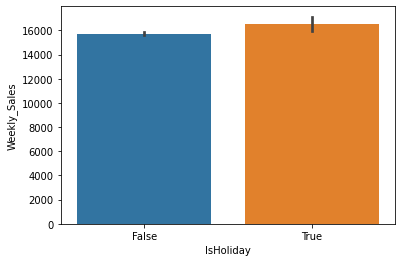

In [ ]:
# Holiday or not
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=walmart)

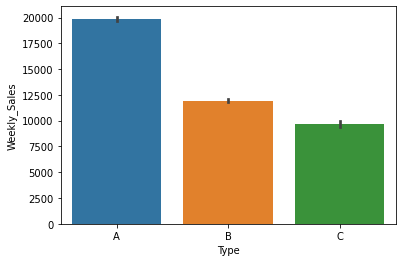

In [ ]:
# Type
sns.barplot(x='Type', y='Weekly_Sales', data=walmart)

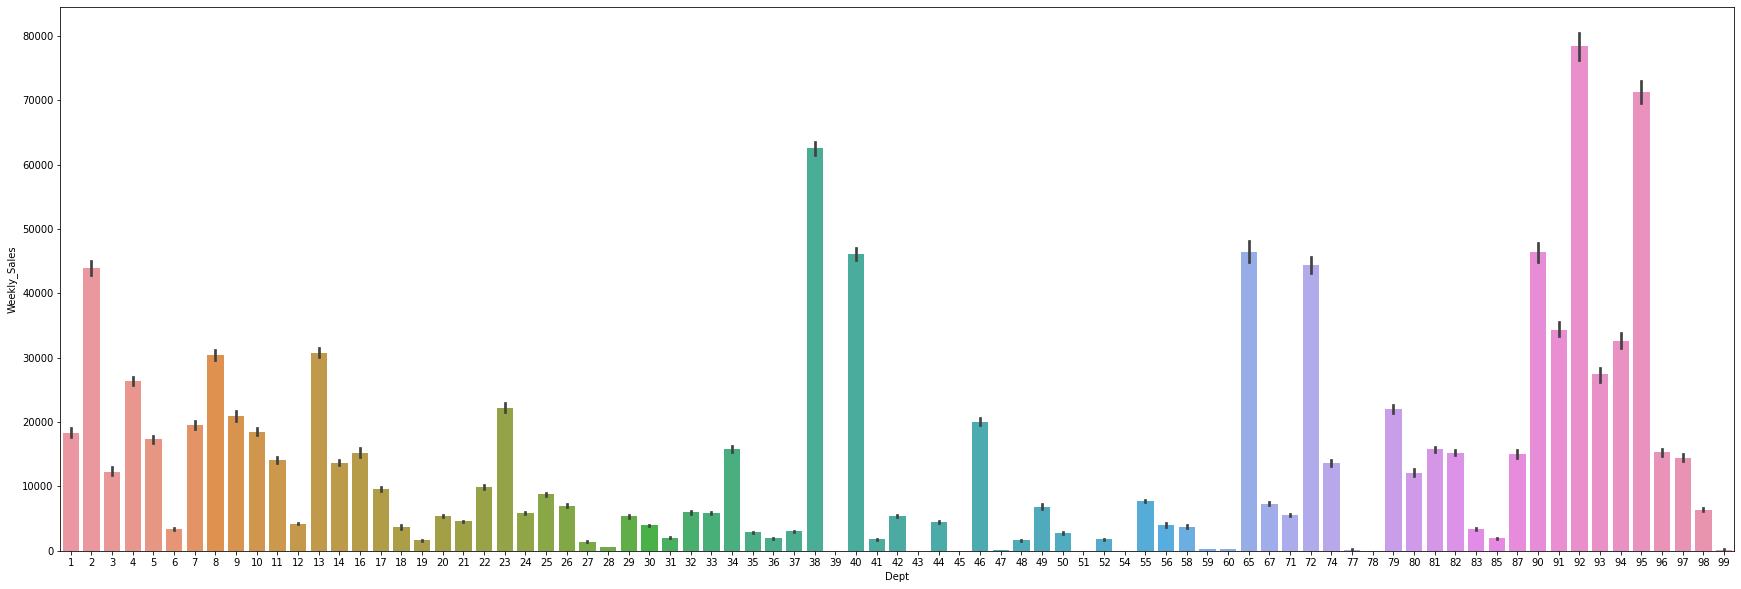

In [ ]:
# Department
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=walmart)

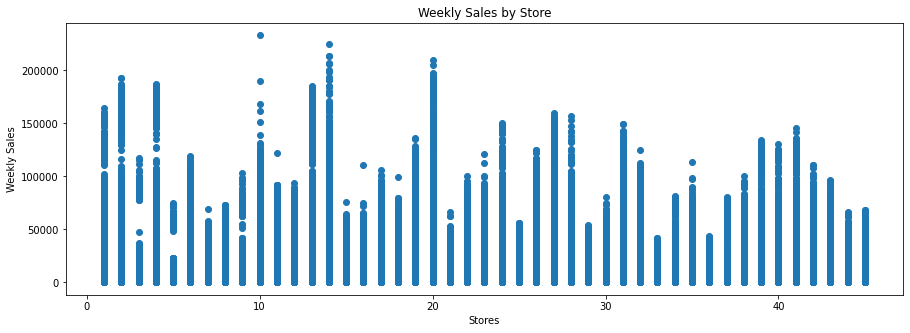

In [ ]:
# Store
x = walmart['Store']
y = walmart['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

Numeric Variables

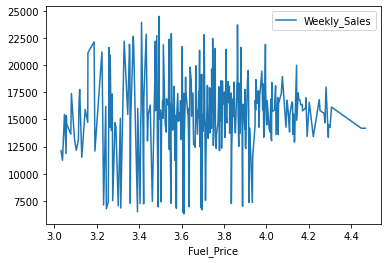

In [ ]:
fuel_price = pd.pivot_table(walmart, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

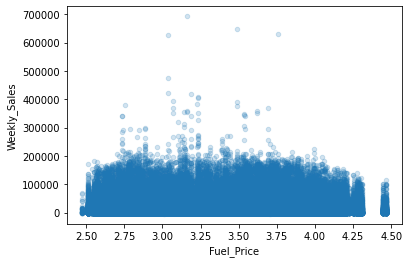

In [ ]:
df.plot.scatter(x="Fuel_Price",y="Weekly_Sales", alpha=0.2)

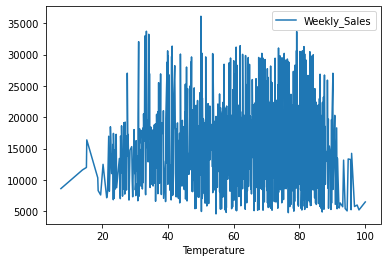

In [ ]:
temp = pd.pivot_table(walmart, values = "Weekly_Sales", index= "Temperature")
temp.plot()

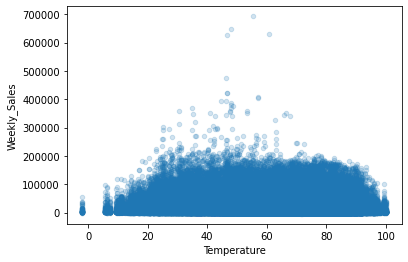

In [ ]:
df.plot.scatter(x="Temperature",y="Weekly_Sales", alpha=0.2)

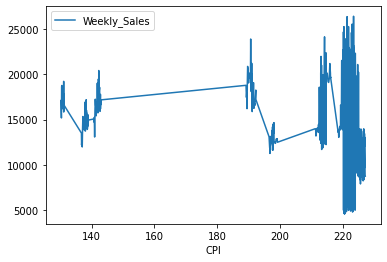

In [ ]:
CPI = pd.pivot_table(walmart, values = "Weekly_Sales", index= "CPI")
CPI.plot()

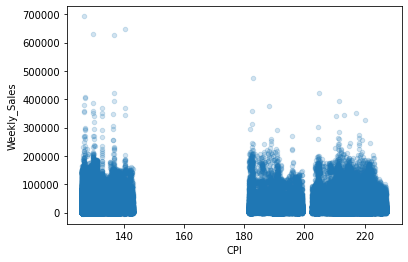

In [ ]:
df.plot.scatter(x="CPI",y="Weekly_Sales", alpha=0.2)

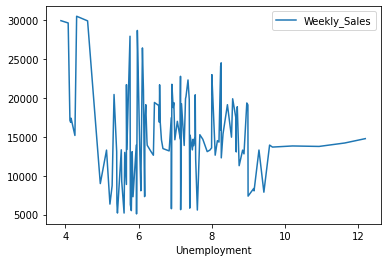

In [ ]:
unemployment = pd.pivot_table(walmart, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

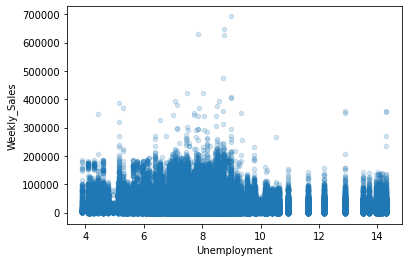

In [ ]:
df.plot.scatter(x="Unemployment",y="Weekly_Sales", alpha=0.2)

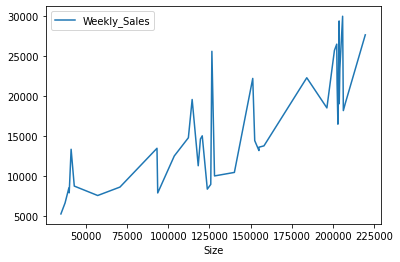

In [ ]:
size = pd.pivot_table(walmart, values = "Weekly_Sales", index= "Size")
size.plot()

# Random Sample

In [ ]:
sample_size = int(len(walmart)*0.01)
print(sample_size)
walmart_sample = walmart.sample(sample_size,random_state=3)
walmart_sample.head()

1270


,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
16289,2,2012-10-26,69.79,3.506,223.078337,6.170,False,46,26984.28,A,202307
347895,37,2012-03-02,64.54,3.630,219.534098,7.244,False,10,341.79,C,39910
374631,40,2012-06-15,63.39,3.683,138.129533,4.125,False,28,280.78,A,155083
175475,18,2012-08-17,73.25,3.840,138.185710,8.535,False,81,12963.41,B,120653
106382,11,2012-01-20,56.43,3.268,223.470055,6.833,False,85,1725.03,A,207499


In [ ]:
#checking if there is any negative values for weekly sales
walmart_sample.loc[walmart_sample['Weekly_Sales']<=0]

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size


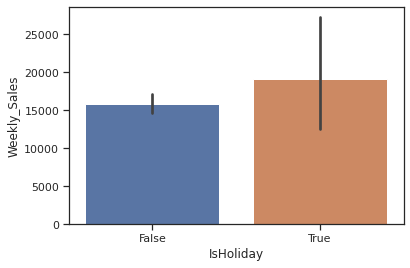

In [ ]:
# Holiday or not
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=walmart_sample)

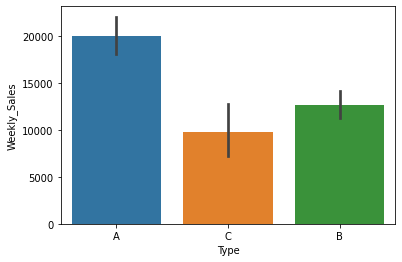

In [ ]:
# Type
sns.barplot(x='Type', y='Weekly_Sales', data=walmart_sample)

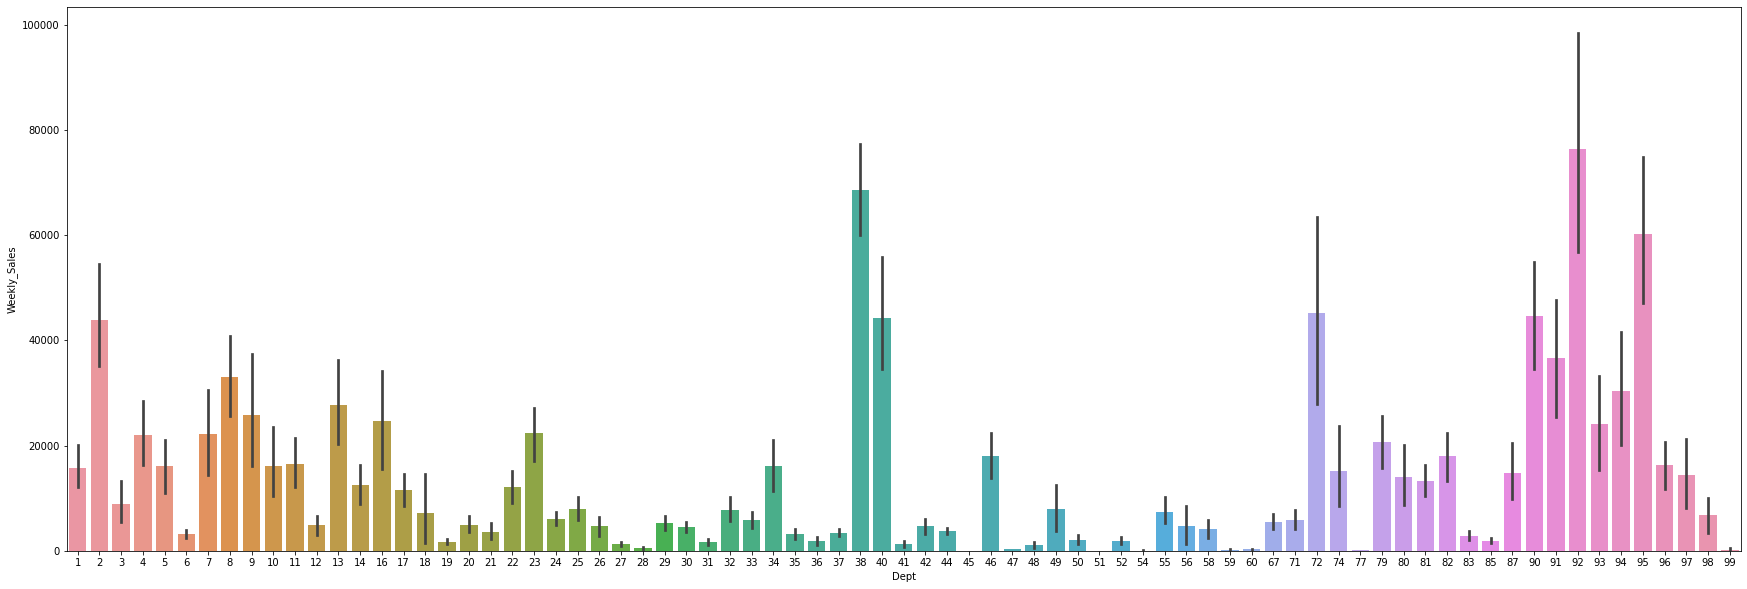

In [ ]:
# Department
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=walmart_sample)

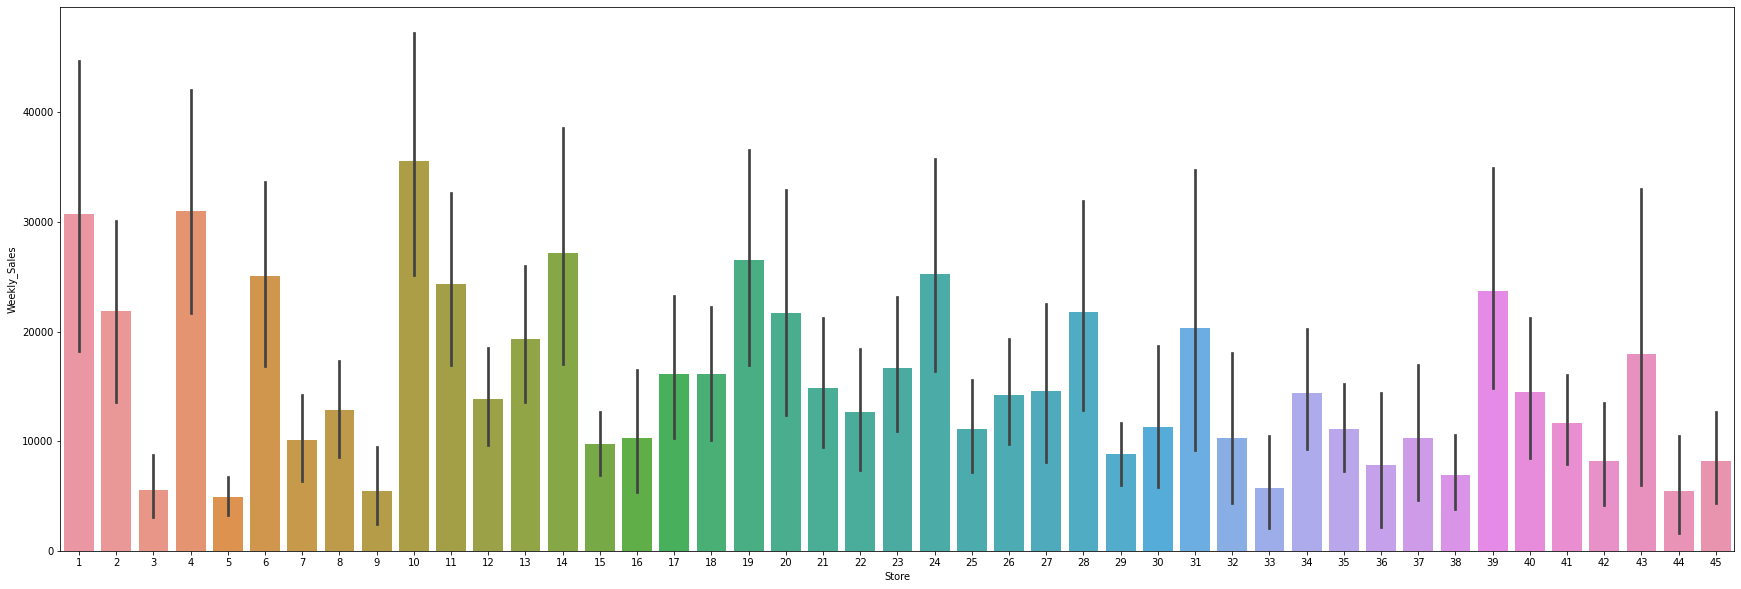

In [ ]:
# Store
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=walmart_sample)

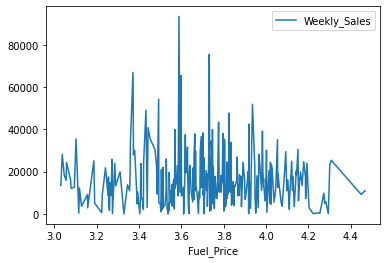

In [ ]:
fuel_price = pd.pivot_table(walmart_sample, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


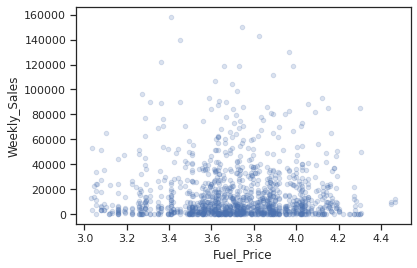

In [ ]:
walmart_sample.plot.scatter(x="Fuel_Price",y="Weekly_Sales", alpha=0.2)

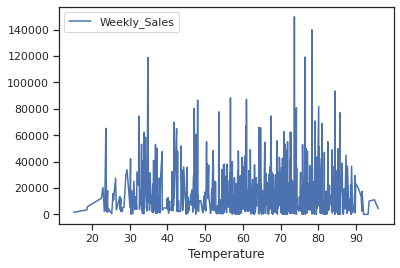

In [ ]:
temp = pd.pivot_table(walmart_sample, values = "Weekly_Sales", index= "Temperature")
temp.plot()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


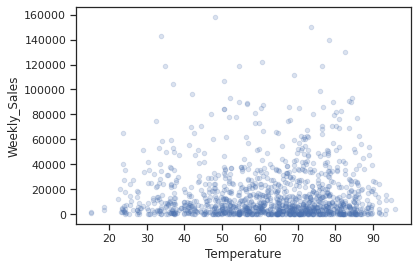

In [ ]:
walmart_sample.plot.scatter(x="Temperature",y="Weekly_Sales", alpha=0.2)

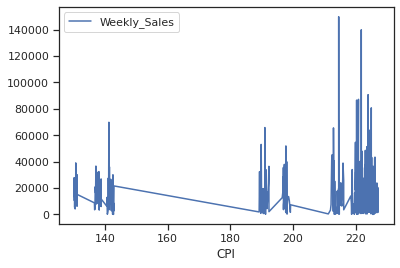

In [ ]:
CPI = pd.pivot_table(walmart_sample, values = "Weekly_Sales", index= "CPI")
CPI.plot()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


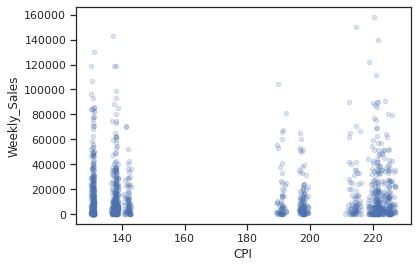

In [ ]:
walmart_sample.plot.scatter(x="CPI",y="Weekly_Sales", alpha=0.2)

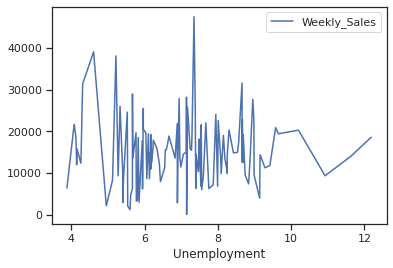

In [ ]:
unemployment = pd.pivot_table(walmart_sample, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


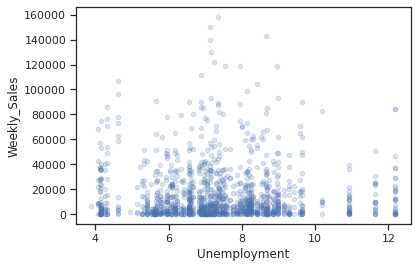

In [ ]:
walmart_sample.plot.scatter(x="Unemployment",y="Weekly_Sales", alpha=0.2)

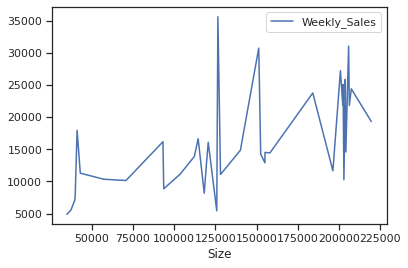

In [ ]:
size = pd.pivot_table(walmart_sample, values = "Weekly_Sales", index= "Size")
size.plot()

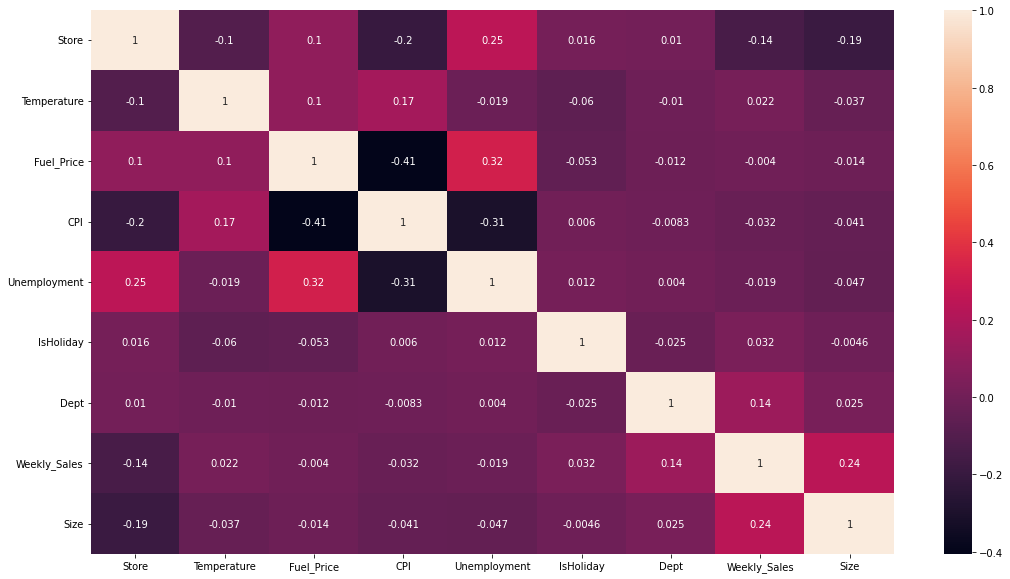

In [ ]:
plt.figure(figsize = (18,10))
sns.heatmap(walmart_sample.corr(), annot=True)

KeyError: ignored

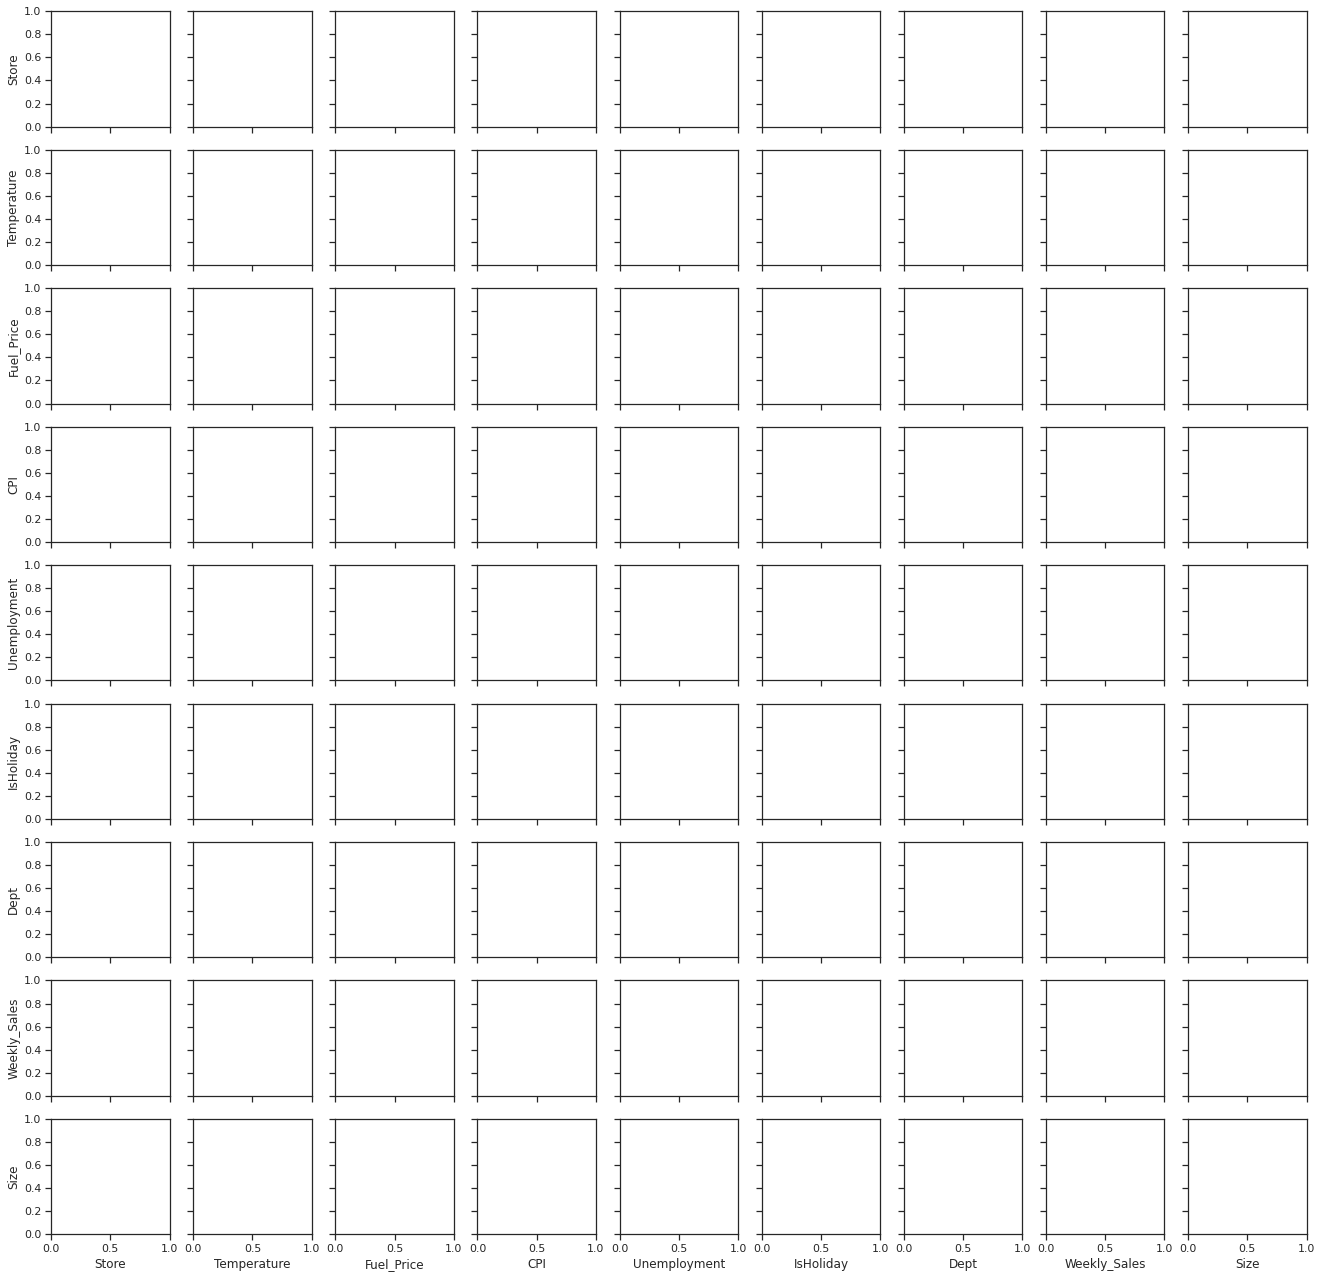

In [ ]:
#sns.set_theme(style="ticks")

#sns.pairplot(walmart_sample, hue="isHoliday")

# Data Preprocessing Before Modeling

In [ ]:
walmart_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1270 entries, 16289 to 35327
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         1270 non-null   int64         
 1   Date          1270 non-null   datetime64[ns]
 2   Temperature   1270 non-null   float64       
 3   Fuel_Price    1270 non-null   float64       
 4   CPI           1270 non-null   float64       
 5   Unemployment  1270 non-null   float64       
 6   IsHoliday     1270 non-null   bool          
 7   Dept          1270 non-null   int64         
 8   Weekly_Sales  1270 non-null   float64       
 9   Type          1270 non-null   object        
 10  Size          1270 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 142.7+ KB


In [ ]:
# changing store and dept into category variable
walmart_sample['Store'] = walmart_sample['Store'].astype('category')
walmart_sample['Dept'] = walmart_sample['Store'].astype('category')
walmart_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1270 entries, 16289 to 35327
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         1270 non-null   category      
 1   Date          1270 non-null   datetime64[ns]
 2   Temperature   1270 non-null   float64       
 3   Fuel_Price    1270 non-null   float64       
 4   CPI           1270 non-null   float64       
 5   Unemployment  1270 non-null   float64       
 6   IsHoliday     1270 non-null   bool          
 7   Dept          1270 non-null   category      
 8   Weekly_Sales  1270 non-null   float64       
 9   Type          1270 non-null   object        
 10  Size          1270 non-null   int64         
dtypes: bool(1), category(2), datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 128.1+ KB


In [ ]:
walmart_sample.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Dept            0
Weekly_Sales    0
Type            0
Size            0
dtype: int64

In [ ]:
walmart_Dummies_df = pd.get_dummies(walmart_sample,drop_first=False)
walmart_Dummies_df.head()

,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales,Size,Store_1,Store_2,...,Dept_39,Dept_40,Dept_41,Dept_42,Dept_43,Dept_44,Dept_45,Type_A,Type_B,Type_C
16289,2012-10-26,69.79,3.506,223.078337,6.170,False,26984.28,202307,0,1,...,0,0,0,0,0,0,0,1,0,0
347895,2012-03-02,64.54,3.630,219.534098,7.244,False,341.79,39910,0,0,...,0,0,0,0,0,0,0,0,0,1
374631,2012-06-15,63.39,3.683,138.129533,4.125,False,280.78,155083,0,0,...,0,1,0,0,0,0,0,1,0,0
175475,2012-08-17,73.25,3.840,138.185710,8.535,False,12963.41,120653,0,0,...,0,0,0,0,0,0,0,0,1,0
106382,2012-01-20,56.43,3.268,223.470055,6.833,False,1725.03,207499,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# changing Truw/ False to 0/1 for IsHoliday
walmart_Dummies_df.replace({False: 0, True: 1}, inplace=True)

In [ ]:
walmart_Dummies_df.head()

,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales,Size,Store_1,Store_2,...,Dept_39,Dept_40,Dept_41,Dept_42,Dept_43,Dept_44,Dept_45,Type_A,Type_B,Type_C
16289,2012-10-26,69.79,3.506,223.078337,6.170,0,26984.28,202307,0,1,...,0,0,0,0,0,0,0,1,0,0
347895,2012-03-02,64.54,3.630,219.534098,7.244,0,341.79,39910,0,0,...,0,0,0,0,0,0,0,0,0,1
374631,2012-06-15,63.39,3.683,138.129533,4.125,0,280.78,155083,0,0,...,0,1,0,0,0,0,0,1,0,0
175475,2012-08-17,73.25,3.840,138.185710,8.535,0,12963.41,120653,0,0,...,0,0,0,0,0,0,0,0,1,0
106382,2012-01-20,56.43,3.268,223.470055,6.833,0,1725.03,207499,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# drop date，if needed
#walmart_Dummies_df = walmart_Dummies_df.drop(['Date'],1)

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# cross validation
nmc = 100
testSize = 0.25

y = walmart_Dummies_df['Weekly_Sales']
X = walmart_Dummies_df[drop]
shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
CVInfo = cross_validate(lr, X, y, cv=shuffle,return_train_score=True)
print('sX,y')
print('train',np.mean(CVInfo['train_score']))
print('test',np.mean(CVInfo['test_score']))


KeyError: ignored

# SVM

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_moons

from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap

# Cross-validation helpers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
np.random.seed(47)

# Tree Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
from matplotlib.colors import ListedColormap


%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [ ]:
# drop date
walmart_Dummies_df = walmart_Dummies_df.drop(['Date'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
np.random.seed(47)
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeRegressor

print(walmart_sample.shape)
X_train, X_test, y_train, y_test = train_test_split(
    walmart_Dummies_df, walmart_Dummies_df.Weekly_Sales, random_state=0)
tree = DecisionTreeRegressor(max_depth=10,random_state=1124)
tree.fit(X_train, y_train)


print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

(1270, 11)
Accuracy on training set: 1.000
Accuracy on test set: 0.997
